In [1]:
import os, re, json, pickle, subprocess, shlex, sys, shutil
from glob import glob
from copy import deepcopy
import numpy as np
from common import * 
import matplotlib.pyplot as plt
import torch
os.chdir("/home/ubuntu/vdp-tool-chain")

In [16]:
# for puzzle_name in os.listdir("data/clevr-puzzles"):
#     if "*" in puzzle_name: continue
#     if "json" in puzzle_name: continue
#     puzzle_dir = os.path.join("data/clevr-puzzles", puzzle_name)
#     scene_file_old_pth = os.path.join(puzzle_dir, puzzle_name + ".json")
#     scene_file_new_pth = os.path.join(puzzle_dir, "scene_file.json")
#     shutil.copy(scene_file_old_pth, scene_file_new_pth)
#     # remove the old scene file

# for puzzle_name in os.listdir("data/clevr-variants"):
#     if "*" in puzzle_name: continue
#     if "json" in puzzle_name: continue
#     if "pkl" in puzzle_name: continue
#     if "logfile" in puzzle_name: continue
#     for fovariant in os.listdir(os.path.join("data/clevr-variants", puzzle_name)):
#         if "*" in fovariant: continue
#         if "json" in fovariant: continue
#         if "pkl" in fovariant: continue
#         if "logfile" in fovariant: continue
#         puzzle_dir = os.path.join("data/clevr-variants", puzzle_name, fovariant)
#         scene_file_old_pth = os.path.join(puzzle_dir, puzzle_name + f"-{fovariant}" + ".json")
#         scene_file_new_pth = os.path.join(puzzle_dir, "scene_file.json")
#         shutil.copy(scene_file_old_pth, scene_file_new_pth)



In [35]:
# to_process = 
puzzle_names = [os.path.join("data/clevr-cleaned-puzzles", fp, fp + ".json") for fp in os.listdir("data/clevr-cleaned-puzzles") if 'json' not in fp] 
variant_names = [os.path.join("data/clevr-cleaned-variants", fp, variant, fp + "-" + variant.split("-swap")[0] + ".json" ) for fp in os.listdir("data/clevr-cleaned-variants") if 'json' not in fp for variant in os.listdir(os.path.join("data/clevr-cleaned-variants", fp) )   if 'json' not in variant]

puzzles = variant_names + puzzle_names

def run_clevr_puzzle(puzzle_path):
    if 'swap' in puzzle_path:
        return [f'FAILED {puzzle_path}']
    puzzle_dir = os.path.dirname(puzzle_path)
    scene_file_pth = os.path.join(puzzle_dir, "scene_file.json")
    shutil.copy(puzzle_path, scene_file_pth)
    if 'fovariant' in puzzle_path:
        puzzle_name = os.path.splitext(os.path.basename(puzzle_path).split("-fovariant")[0])[0]
    else:
        puzzle_name = os.path.splitext(os.path.basename(puzzle_path))[0]

    n_quantifiers = flags[puzzle_name].split("-")[1].strip()
    cmd = f"""
    python
    clevr_driver.py
    --puzzle_dir {puzzle_dir}
    --examples "3 4 5 6"
    --candidates "0 1 2"
    --vdp_flags "- {n_quantifiers} --autotune"
    --use_gpu
    """.strip().replace("\n", " ")
    print(cmd)
    # shutil.copy(puzzle_name, os.path.join(puzzle_dir, "scene_file.json"))
    # logs = exec_cmd(cmd)
    logs = ["test"]
    if logs is None:
        return [f'FAILED {puzzle_path}']
    
    logs = [f"SUCCESS {puzzle_path}"] + logs
    return logs



run_clevr_puzzle(puzzles[1])


python     clevr_driver.py     --puzzle_dir data/clevr-cleaned-variants/apocope/fovariant-1     --examples "3 4 5 6"     --candidates "0 1 2"     --vdp_flags "- 2 --autotune"     --use_gpu


['SUCCESS data/clevr-cleaned-variants/apocope/fovariant-1/apocope-fovariant-1.json',
 'test']

In [16]:
# pth = "/home/ubuntu/vdp-tool-chain/data/ns-vqa-data/mask_rcnn/results/clevr_val_pretrained/detections.pkl"
# with open(pth, 'rb') as fp:
#     d = pickle.load(fp)

arr1 = torch.load("attr_net_x_472.pkl")
arr2 = torch.load("attr_net_x2_472.pkl")
arr3 = torch.load("attr_net_out_472.pkl")
idxs = read_pickle("idxs.pkl")

arr1.shape, arr2.shape, arr3.shape



(torch.Size([22, 6, 224, 224]),
 torch.Size([22, 512, 1, 1]),
 torch.Size([22, 18]))

In [20]:
idxs

tensor([ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,
         3,  3,  4,  4,  4,  5,  5,  5])

In [14]:
arr3[6]

tensor([-0.0240,  0.9626,  0.0483,  0.0090,  0.9808,  0.9738,  0.0183,
        -0.0014, -0.0034, -0.0014, -0.0020,  0.0094, -0.0102,  1.0093,
        -0.0021,  2.8554,  0.2414,  0.3566], device='cuda:0')

In [3]:
with open("/home/ubuntu/vdp-tool-chain/assets.pkl", 'rb') as fp:
    d2 = pickle.load(fp)

In [19]:
# with open("/home/ubuntu/vdp-tool-chain/attr_net_x.pkl", 'rb') as fp:
#     d3 = torch.load(fp)

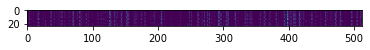

In [29]:
plt.imshow(d3[:, :, 0, 0].detach().cpu().numpy().round(3))

In [4]:
# plt.imshow(arr[1][, 0, :, :])
s = (d2['predictions'][0].reshape(-1).tolist())

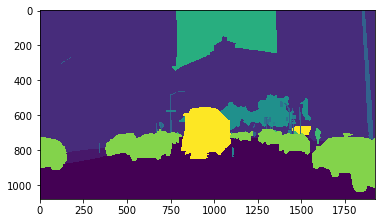

In [6]:
plt.imshow(d2['predictions'][0])

In [42]:
import cv2
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from skimage.measure import label, regionprops
from skimage.util import montage
montage_rgb = lambda x: np.stack([montage(x[:, :, :, i]) for i in range(x.shape[3])], -1)

In [17]:
d2['predictions'][0]

array([[2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       [2, 2, 2, ..., 2, 2, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [18]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [25]:
ohd2 = get_one_hot(d2['predictions'][0], 30)

Found bbox (0, 0, 0, 1080, 1920, 3)
Found bbox (0, 754, 10, 346, 1360, 11)
Found bbox (0, 1844, 5, 743, 1913, 6)
Found bbox (0, 1862, 2, 736, 1920, 3)
Found bbox (269, 117, 5, 308, 179, 6)
Found bbox (309, 113, 5, 311, 116, 6)
Found bbox (314, 106, 5, 315, 107, 6)
Found bbox (461, 745, 5, 569, 830, 6)
Found bbox (481, 1029, 7, 685, 1428, 9)
Found bbox (502, 1492, 8, 633, 1551, 9)
Found bbox (521, 1375, 6, 555, 1391, 7)
Found bbox (528, 1394, 5, 684, 1437, 7)
Found bbox (550, 1407, 2, 582, 1425, 3)
Found bbox (554, 1486, 5, 709, 1497, 6)
Found bbox (555, 809, 16, 851, 1095, 17)
Found bbox (557, 1444, 5, 574, 1449, 6)
Found bbox (569, 720, 7, 583, 778, 8)
Found bbox (574, 1433, 7, 640, 1470, 9)
Found bbox (581, 852, 8, 587, 856, 9)
Found bbox (583, 746, 5, 701, 756, 6)
Found bbox (587, 1446, 5, 598, 1451, 6)
Found bbox (588, 1442, 2, 598, 1446, 3)
Found bbox (607, 796, 8, 639, 831, 9)
Found bbox (612, 1282, 5, 681, 1324, 7)
Found bbox (613, 1409, 6, 635, 1421, 7)
Found bbox (622, 1436, 5

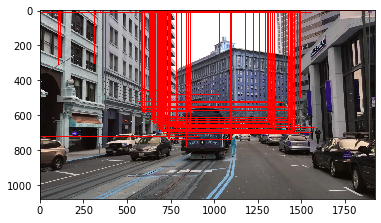

In [50]:
img0 = cv2.imread("semantic-segmentation/imgs/test_imgs/sf.jpg")
lhd2 = label(ohd2)
props = regionprops(lhd2)
for prop in props:
    print('Found bbox', prop.bbox)
    cv2.rectangle(img0, (prop.bbox[1], prop.bbox[0]), (prop.bbox[3], prop.bbox[2]), (255, 0, 0), 2)


plt.imshow(img0)

In [26]:
def exec_cmd(cmd):
    print(f"LOG: exec_cmd({cmd})")
    try:
        raw_output = subprocess.check_output(shlex.split(cmd), universal_newlines=True)
        output = raw_output.split("\n")
        return output
    except subprocess.CalledProcessError as e:
        print(f"LOG: exec_cmd({cmd}) failed with err: {e.returncode}", f"\n{e.output}")
        return None


In [14]:
with open("variant-run.log") as fp:
    reruned = [l.replace("SKIPPING", "").strip() for i, l in enumerate(fp.readlines()) if 'SKIPPING' in l]
rerun =  list(filter(lambda x: 'swap' not in x, map(lambda x: f"{os.path.basename(os.path.dirname(x))}-{os.path.basename(x)}", glob("data/clevr-cleaned-variants/*/*"))))

to_rerun = list(set(rerun) - set(reruned))

In [25]:
for r in  rerun:
    puzzle_name, var_idx = r.split("-fovariant-")
    pz_flags = flags[puzzle_name] if puzzle_name in flags else "- 2 -N 100"
    print(puzzle_name, var_idx)
    scenes_pth  = os.path.join("data/output/", f'CLEVR_{r}-swap_scenes.json')
    swap_pz_pth = os.path.join("data/clevr-cleaned-variants", puzzle_name, f'fovariant-{var_idx}-swap')
    swap_gen_pth = os.path.join(swap_pz_pth, f"{r}.json")
    if os.path.exists(swap_pz_pth):
    #     with open(os.path.join("data/output/", f'CLEVR_{r}_scenes.json')) as fin:
    #         with open(scenes_pth, 'w') as fout:
    #             for line in fin:
    #                 fout.write(line.replace(r, r + "-swap"))
        cmd = f"./driver-no-gen.sh {swap_gen_pth} {r + '-swap'} \"3 4 5\" \"0 1 2\" \"{pz_flags}\" "
        output = exec_cmd(cmd=cmd)
        print(output)

ovariant-10.json /home/ubuntu/vdp-tool-chain/data/clevr-cleaned-variants/breaking/fovariant-10-swap/breaking-fovariant-10-swap.out /home/ubuntu/vdp-tool-chain/data/clevr-cleaned-variants/breaking/fovariant-10-swap/breaking-fovariant-10-swap.log', 'DONE!', '']
breaking 20
LOG: exec_cmd(./driver-no-gen.sh data/clevr-cleaned-variants/breaking/fovariant-20-swap/breaking-fovariant-20.json breaking-fovariant-20-swap "3 4 5" "0 1 2" "- 2 -N 100 -C 2" )
['/home/ubuntu/vdp-tool-chain/data/clevr-cleaned-variants/breaking/fovariant-20-swap/breaking-fovariant-20.json /home/ubuntu/vdp-tool-chain/data/clevr-cleaned-variants/breaking/fovariant-20-swap/breaking-fovariant-20-swap.out /home/ubuntu/vdp-tool-chain/data/clevr-cleaned-variants/breaking/fovariant-20-swap/breaking-fovariant-20-swap.log', 'DONE!', '']
breaking 14
LOG: exec_cmd(./driver-no-gen.sh data/clevr-cleaned-variants/breaking/fovariant-14-swap/breaking-fovariant-14.json breaking-fovariant-14-swap "3 4 5" "0 1 2" "- 2 -N 100 -C 2" )
['/ho

In [41]:
frv = read_json("data/clevr-cleaned-variants/full-run-variants.json")

get_attr = lambda obj:  (obj['size'], obj['shape'], obj['material'], obj['color'])


def collect_attr(scene, i):
    for j, obj in enumerate(scene['objects']):
        sz, sh, m, c = get_attr(obj)
        sizes[sz].append( (i, j) )
        shapes[sh].append( (i, j) )
        materials[m].append( (i, j) )
        colors[c].append( (i, j) )

In [42]:
frv_list = list(frv.values())
in_json = frv_list[0] 

In [43]:
from collections import defaultdict
sizes, shapes, materials, colors = defaultdict(list), defaultdict(list), defaultdict(list), defaultdict(list)
    
for i, scene in enumerate(in_json['scenes']):
    collect_attr(scene, i)


In [1]:
# {{< columns >}}
# ![000003.png](/output/images/agreement-fovariant-0/CLEVR_agreement-fovariant-0_000003.png)

# <--->
# ![000004.png](/output/images/agreement-fovariant-0/CLEVR_agreement-fovariant-0_000004.png)
# <--->
# ![000005.png](/output/images/agreement-fovariant-0/CLEVR_agreement-fovariant-0_000005.png)
# {{< /columns >}}



train_imgs = ["/output/images/agreement-fovariant-0/CLEVR_agreement-fovariant-0_000003.png",
"/output/images/agreement-fovariant-0/CLEVR_agreement-fovariant-0_000004.png",
"/output/images/agreement-fovariant-0/CLEVR_agreement-fovariant-0_000005.png",]


In [19]:
from glob import glob
import torch
pz_pth = "../data/clevr-cleaned-variants"

all_imgs = list()
all_swaps = list()
for (absdir, folders, files) in os.walk(pz_pth, followlinks=False):
    if absdir == pz_pth:
        puzzles = [os.path.join(pz_pth, p) for p in folders]
    if absdir in puzzles:
        puzzle_name = os.path.basename(absdir)
        # if ("*" in puzzle_name) or (puzzle_name not in to_run):
        #     continue
        for v_dir in glob(os.path.join(absdir, "*")):
            if ".pkl" in v_dir or '.json' in v_dir:
                continue
            v_name = os.path.basename(v_dir)
            images = sorted(glob(os.path.join(v_dir, f"CLEVR_{puzzle_name}-{v_name}_*.png")))
            if "swap" in v_dir:
                all_swaps.append((images, torch.Tensor([0, 1, 2, 3, 4, 5]), v_dir))
                continue
            all_imgs.append((images, torch.Tensor([0, 1, 2, 3, 4, 5]), v_dir))
            # puzzle_name, variant_number = os.path.basename(absdir).split("-fovariant-")
            # if ("*" in puzzle_name) or (puzzle_name not in to_run):
            #     continue
            # pth = os.path.join(absdir, "filter-1.pkl")
            # all_pths.append(pth)

all_imgs.extend(all_swaps)

all_imgs = list(sorted(all_imgs, key=lambda x: ('swap' in x[2], x[2]) ))

In [16]:
import pickle
import numpy as np
import pandas as pd
# with open("../allimgs.pkl", 'rb') as fp:
#     all_imgs = pickle.load(fp)


# all_imgs = list(sorted(all_imgs, key=lambda x: x[2]))

In [20]:
imgdf = pd.DataFrame(all_imgs, columns=['imgs', 'idx', 'puzzle'])
imgdf['swap'] = imgdf['puzzle'].str.contains('swap')
imgdf['puzzle_name'] = imgdf['puzzle'].apply(lambda x: os.path.basename(os.path.dirname(x)))
imgdf.reset_index(inplace=True)
d = imgdf.groupby(['puzzle_name', 'swap']).agg({'index' : [np.min, np.max]}).reset_index().to_dict('index')
df = imgdf.groupby(['puzzle_name', 'swap']).agg({'index' : [np.min, np.max]}).reset_index()#.to_dict('index')

In [13]:
# df['diff'] =  df[df.reset_index()['swap'] == True][('index', 'amax')] - df[df.reset_index()['swap'] == True][('index', 'amin')] +1


# df.fillna(0)

In [21]:
d = {k : list(v.values()) for k, v in d.items()}
d

{0: ['agreement', False, 0, 24],
 1: ['alternate-color', False, 25, 49],
 2: ['alternation', False, 50, 74],
 3: ['alternation', True, 375, 449],
 4: ['aphaeresis', False, 75, 99],
 5: ['apocope', False, 100, 124],
 6: ['apocope', True, 450, 499],
 7: ['assimilation', False, 125, 149],
 8: ['assimilation', True, 500, 574],
 9: ['breaking', False, 150, 174],
 10: ['breaking', True, 575, 599],
 11: ['circle-at-ends', False, 175, 199],
 12: ['circle-at-ends', True, 600, 624],
 13: ['devoicing', False, 200, 224],
 14: ['devoicing', True, 625, 649],
 15: ['meeussen', False, 225, 249],
 16: ['partition', False, 250, 274],
 17: ['shield', False, 275, 299],
 18: ['shield', True, 650, 724],
 19: ['spy', False, 300, 324],
 20: ['spy', True, 725, 774],
 21: ['threepack', False, 325, 349],
 22: ['threepack', True, 775, 799],
 23: ['train', False, 350, 374],
 24: ['train', True, 800, 824]}

In [10]:



pz_partition = {'agreement'         : [0, 49],          # 50
                'alternate-color'   : [50, 99],         # 50
                'alternation'       : [100, 299],       # 300
                'aphaeresis'        : [300, 349],       # 50
                'apocope'           : [350, 499],       # 150
                'assimilation'      : [500, 699],       # 200
                'breaking'          : [700, 799],       # 100
                'circle-at-ends'    : [800, 899],       # 100
                'devoicing'         : [900, 999],       # 100
                'meeussen'          : [1000, 1049],     # 50
                'partition'         : [1050, 1099],     # 50
                'shield'            : [1100, 1299],     # 100
                'spy'               : [1300, 1449],     # 150
                'threepack'         : [1450, 1549],     # 100
                'train'             : [1550, 1649]}     # 100

get_pz_partition = lambda x : pz_partition[x]

train_on = [
    'assimilation',
    'apocope',
    'alternation'
]

import itertools



In [7]:
# %load_ext autoreload
# %autoreload 2
import common

In [14]:
common.out_parser("../data/clevr-variants/apocope/fovariant-5-swap1/apocope-fovariant-5-swap1.json")


../data/clevr-variants/apocope/fovariant-5-swap1/apocope-fovariant-5.json 1


In [45]:
import torch

imgs = torch.arange(60).view(6, 5, 2)
label = torch.Tensor([0, 1, 2, 3, 4, 5])

candidate_perm = torch.randperm(3)
train_perm     = torch.randperm(3) + 3

perm = torch.cat([candidate_perm, train_perm])

perm

tensor([1, 2, 0, 3, 5, 4])

In [12]:
%load_ext autoreload
%autoreload 2
import common


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
ds = common.VDPImage("../data/clevr-cleaned-variants", list(common.flags.keys()), emit_path=True)